In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting

plotting.BACKEND = 'matplotlib'
plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
# get logo graph from pygsp
G = graphs.Logo()

In [3]:
# Graph signal: each letter gets a different value + additive noise.
rs = np.random.RandomState(42)  # Reproducible result
s = np.zeros(G.N)
s[G.info['idx_g']-1] = -1
s[G.info['idx_s']-1] = 0
s[G.info['idx_p']-1] = 1
s += rs.uniform(-0.5, 0.5, size=G.N)

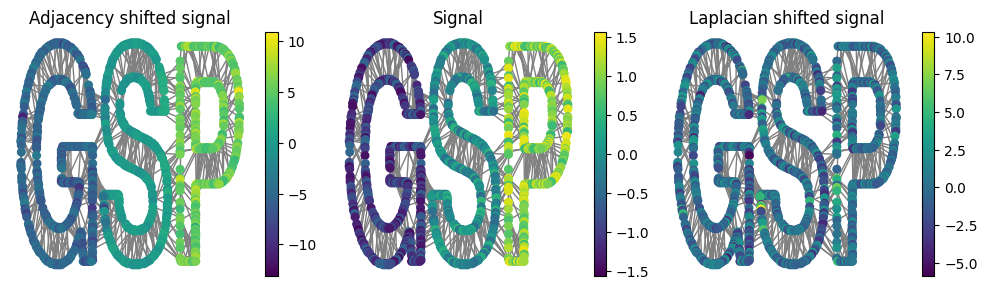

In [4]:
# adjacency is called weight matrix in pygsp
shifted_adjacency = G.W @ s
shifted_laplacian = G.L @ s
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
G.plot_signal(shifted_adjacency, vertex_size=30, ax=axes[0])
_ = axes[0].set_title('Adjacency shifted signal')
axes[0].set_axis_off()
fig.tight_layout()
G.plot_signal(s, vertex_size=30, ax=axes[1])
_ = axes[1].set_title('Signal')
axes[1].set_axis_off()
G.plot_signal(shifted_laplacian, vertex_size=30, ax=axes[2])
_ = axes[2].set_title('Laplacian shifted signal')
axes[2].set_axis_off()
fig.tight_layout()

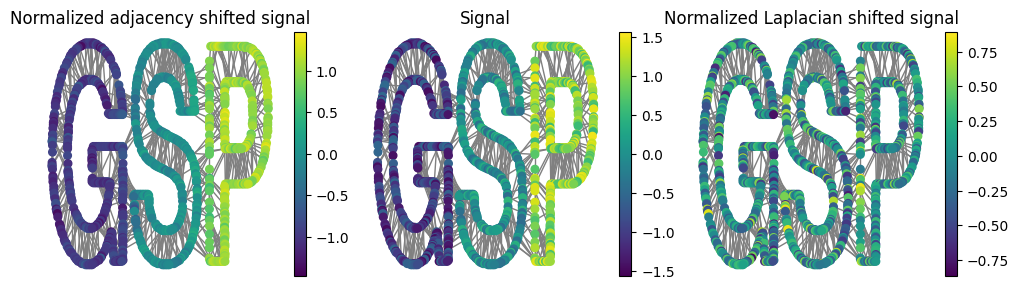

In [5]:
# normalized shift by degrees
shifted_adjacency = (np.linalg.inv(np.diag(G.d)) @ G.W) @ s
shifted_laplacian = (np.linalg.inv(np.diag(G.d)) @  G.L) @ s
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
G.plot_signal(shifted_adjacency, vertex_size=30, ax=axes[0])
_ = axes[0].set_title('Normalized adjacency shifted signal')
axes[0].set_axis_off()
fig.tight_layout()
G.plot_signal(s, vertex_size=30, ax=axes[1])
_ = axes[1].set_title('Signal')
axes[1].set_axis_off()
G.plot_signal(shifted_laplacian, vertex_size=30, ax=axes[2])
_ = axes[2].set_title('Normalized Laplacian shifted signal')
axes[2].set_axis_off()
fig.tight_layout()